# Dataset Generation

In [2]:
from skmultiflow.data import SEAGenerator 
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.drift_detection.adwin import ADWIN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir("..")
print(os.getcwd())

/work/lurny/files/Thesis


## Rotating Hyperplane

In [10]:
stream = HyperplaneGenerator(mag_change=0.001)

In [11]:
temp = stream.next_sample(100000)
stacked_data = np.column_stack((temp[0],temp[1]))
print(stacked_data.shape)
stream_data = pd.DataFrame(stacked_data)

(100000, 11)


## RBF different speed

In [20]:
#(1,0.01) (1,5 ,0.005) (2,0.001) (3,0.0001) (4, 0.00001) (5, 0.000001) (6, 0.0000001) (7, 0.00000001)
stream = RandomRBFGeneratorDrift(change_speed = 0.005)

temp = stream.next_sample(250000)
stacked_data = np.column_stack((temp[0],temp[1]))
data = pd.DataFrame(data = stacked_data)#, columns = feature_names)
data.to_csv('datasets_streaming/rbf_1,5.csv', index=False)

In [21]:
test = pd.read_csv('datasets_streaming/rbf_1,5.csv')
test['10'].value_counts()

0.0    130589
1.0    119411
Name: 10, dtype: int64

### Plot for different speeds

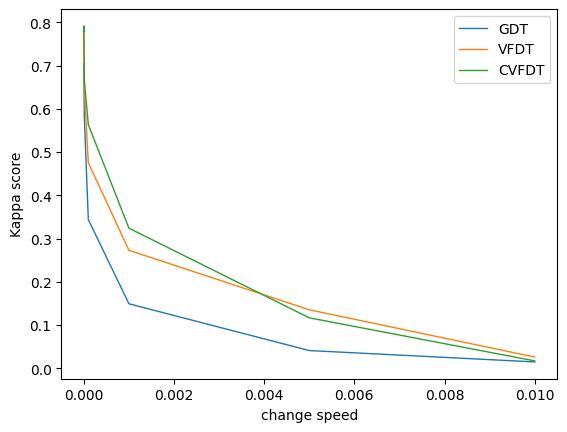

In [24]:
X = [0.01, 0.005, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
gdt = [0.0146, 0.0409, 0.1491, 0.3439, 0.5851, 0.704, 0.7049]
vfdt = [0.0258, 0.1352, 0.2729, 0.4754, 0.646, 0.7864, 0.7793]
cvfdt = [0.017, 0.1166, 0.324, 0.5633, 0.6669, 0.7919, 0.7795]


plt.plot(X, gdt, label='GDT', linewidth=1)
plt.plot(X, vfdt, label='VFDT', linewidth=1)
plt.plot(X, cvfdt, label='CVFDT', linewidth=1)


  
# Naming the x-axis, y-axis and the whole graph
plt.ylabel("Kappa score")
plt.xlabel("change speed")
#plt.title()
plt.legend()
ax = plt.gca()
#ax.axes.xaxis.set_ticklabels([])
plt.savefig('results/rbf_speed/drift_speed_plot.png', dpi = 300.0)
plt.show()

## RBF_f

In [9]:
stream = RandomRBFGeneratorDrift(change_speed = 0.01)

temp = stream.next_sample(250000)
stacked_data = np.column_stack((temp[0],temp[1]))
data = pd.DataFrame(data = stacked_data)#, columns = feature_names)
data.to_csv('datasets_streaming/rbf_f.csv', index=False)

In [14]:
test = pd.read_csv('datasets_streaming/rbf_f.csv')
test['10'].value_counts()

0.0    135073
1.0    114927
Name: 10, dtype: int64

## RBF_m

In [13]:
stream = RandomRBFGeneratorDrift(change_speed = 0.0001)

temp = stream.next_sample(250000)
stacked_data = np.column_stack((temp[0],temp[1]))
data = pd.DataFrame(data = stacked_data)#, columns = feature_names)
data.to_csv('datasets_streaming/rbf_m.csv', index=False)

In [15]:
test = pd.read_csv('datasets_streaming/rbf_m.csv')
test['10'].value_counts()

0.0    133921
1.0    116079
Name: 10, dtype: int64

## Adwin

In [15]:
stream_data.iloc[0,:].tolist()

[0.8312193586308629,
 0.18967413312268327,
 0.35762446682406135,
 0.07825689756631858,
 0.9170027100471186,
 0.6640050854867362,
 0.10053494587076721,
 0.5953246878564363,
 0.931994368803802,
 0.17373542062324887,
 1.0]

In [2]:
data_stream = np.random.randint(2, size=2000)

In [3]:
data_stream

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
# Imports
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN
adwin = ADWIN()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000
for i in range(999, 2000):
    data_stream[i] = np.random.randint(4, high=8)
# Adding stream elements to ADWIN and verifying if drift occurred
for i in range(2000):
    adwin.add_element(data_stream[i])
    if adwin.detected_change():
        print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

Change detected in data: 6 - at index: 1023
Change detected in data: 7 - at index: 1055
Change detected in data: 6 - at index: 1087


In [7]:
data_stream[1023]

6

In [15]:
from utilities.utilities_GDT import *

In [32]:
X_data, y_data, nominal_features, ordinal_features = load_dataset_for_streams(identifier = 'BIN:sea_g', 
                                                                              max_total_samples = 1000000)

In [33]:
y_data.value_counts()

1.0    599100
0.0    400900
Name: class, dtype: int64

## Plots Class distribution SEA

In [2]:
import math
def split_df_chunks(data_df,chunk_size):
    total_length     = len(data_df)
    normal_chunk_num = math.floor(total_length/chunk_size)
    chunks = []
    for i in range(normal_chunk_num):
        chunk = data_df[(i*chunk_size):((i+1)*chunk_size)]
        chunks.append(chunk)

    return chunks

In [27]:
full_dataset = pd.read_csv('datasets_streaming/sea_a.csv')['class']
data = split_df_chunks(full_dataset, 2500)
dist = np.array([])
for d in data:
    dist = np.append(dist,d.value_counts(1)[1]*100)


In [37]:
full_dataset = pd.read_csv('datasets_streaming/NEweather_class.csv')['0']

data = split_df_chunks(full_dataset, 1000)
dist = np.array([])
for d in data:
    dist = np.append(dist,d.value_counts(1)[1]*100)

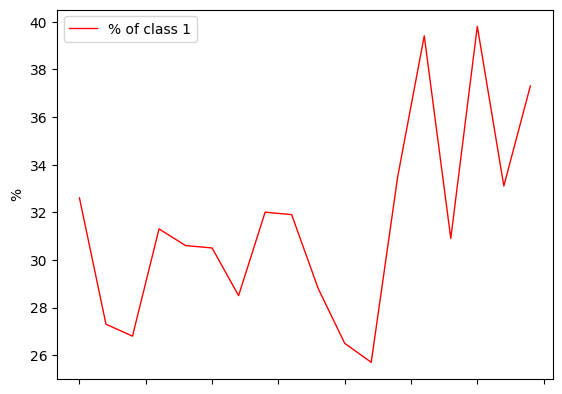

In [38]:
X = np.arange(0, len(dist), 1)

plt.plot(X, dist, color='r', label='% of class 1', linewidth=1)

  
# Naming the x-axis, y-axis and the whole graph
plt.ylabel("%")
#plt.title()
plt.legend()
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
#plt.savefig('results/'+'sea_g'+'/class_dist.png', dpi = 300.0)
plt.show()